### Импорты


In [9]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Загрузка данных

In [2]:
df = pd.read_csv('raw/processed_full/final_dataset.csv', sep='\t', encoding='utf-8')
model = joblib.load('models/rf_classifier.pkl')
tfidf = joblib.load('models/tfidf_vectorizer.pkl')


C:\Python38\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid resu

### График распределения категорий

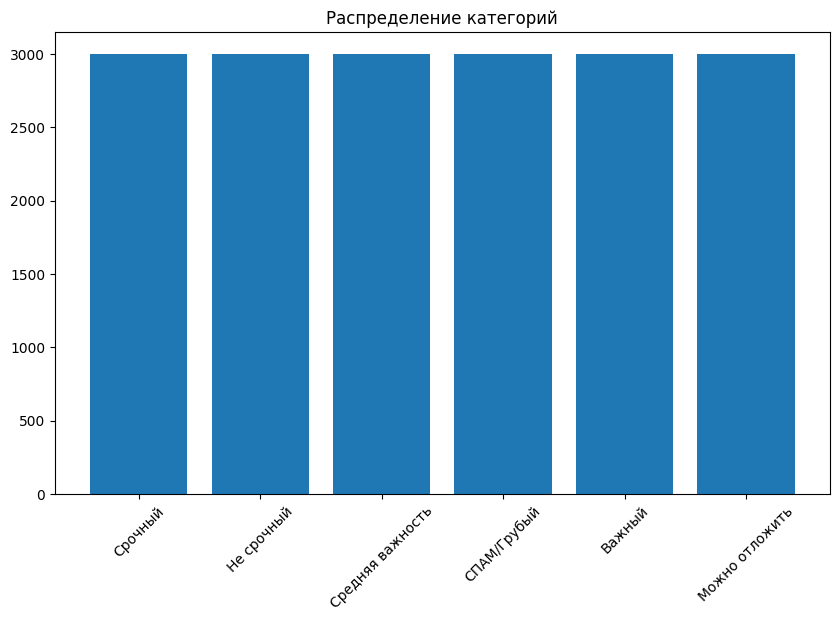

In [3]:
plt.figure(figsize=(10,6))
counts = df['category'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Распределение категорий')
plt.xticks(rotation=45)
plt.show()


### Важные признаки

In [4]:
feature_names = tfidf.get_feature_names_out()
importances = model.feature_importances_


### Топ важных слов

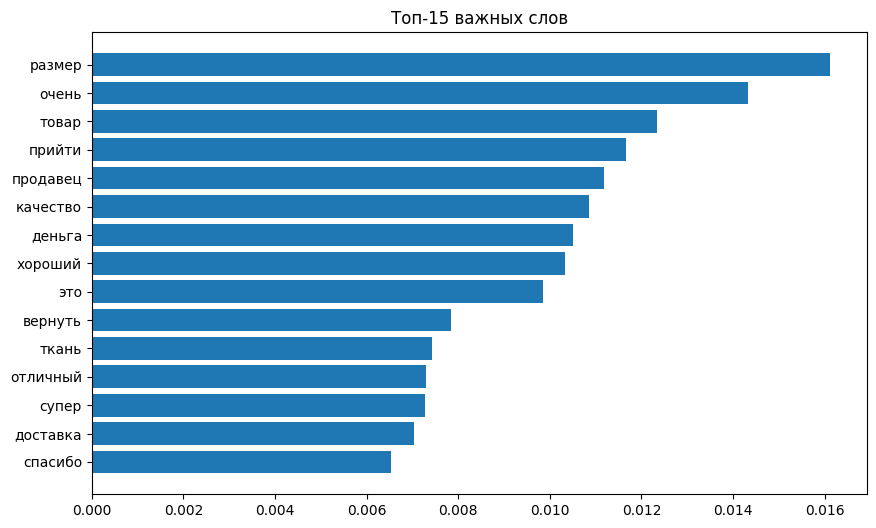

In [5]:
top_n = 15
top_idx = np.argsort(importances)[-top_n:][::-1]
top_words = [feature_names[i] for i in top_idx]
top_scores = importances[top_idx]

plt.figure(figsize=(10,6))
plt.barh(range(len(top_words)), top_scores)
plt.yticks(range(len(top_words)), top_words)
plt.title('Топ-15 важных слов')
plt.gca().invert_yaxis()
plt.show()


### Confusion Matrix

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


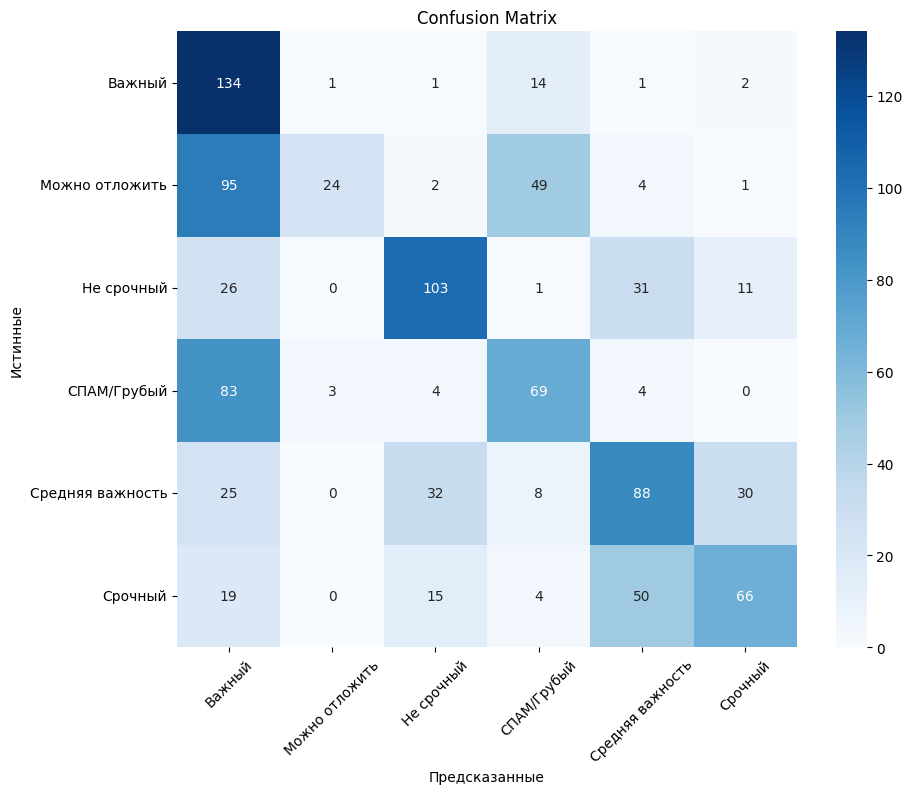

In [6]:
from sklearn.metrics import confusion_matrix

sample = df.sample(n=1000, random_state=42)
X_sample = tfidf.transform(sample['text'].str.lower())
y_true = sample['category']
y_pred = model.predict(X_sample)

cm = confusion_matrix(y_true, y_pred, labels=model.classes_)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### Примеры на тестовых текстах

In [7]:
test_texts = [
    ("сайт не работает, все упало", "Срочный"),
    ("спасибо, все отлично", "Не срочный"),
    ("добавьте пожалуйста функцию", "Можно отложить"),
    ("иди нах, приложение говно", "СПАМ/Грубый")
]

print("Тестирование модели:")

for text, expected in test_texts:
    vec = tfidf.transform([text.lower()])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0]
    
    print(f"\nТекст: {text}")
    print(f"Ожидается: {expected}")
    print(f"Предсказано: {pred} ")
    
    prob_dict = dict(zip(model.classes_, prob))
    top_2 = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:2]
    for cat, p in top_2:
        print(f"  {cat}: {p:.3f}")

Тестирование модели:

Текст: сайт не работает, все упало
Ожидается: Срочный
Предсказано: Важный 
  Важный: 0.703
  СПАМ/Грубый: 0.108


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job


Текст: спасибо, все отлично
Ожидается: Не срочный
Предсказано: Не срочный 
  Не срочный: 0.665
  Важный: 0.264

Текст: добавьте пожалуйста функцию
Ожидается: Можно отложить
Предсказано: Важный 
  Важный: 1.000
  Можно отложить: 0.000

Текст: иди нах, приложение говно
Ожидается: СПАМ/Грубый
Предсказано: СПАМ/Грубый 
  СПАМ/Грубый: 0.512
  Важный: 0.429


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


### 2D проекция текстов

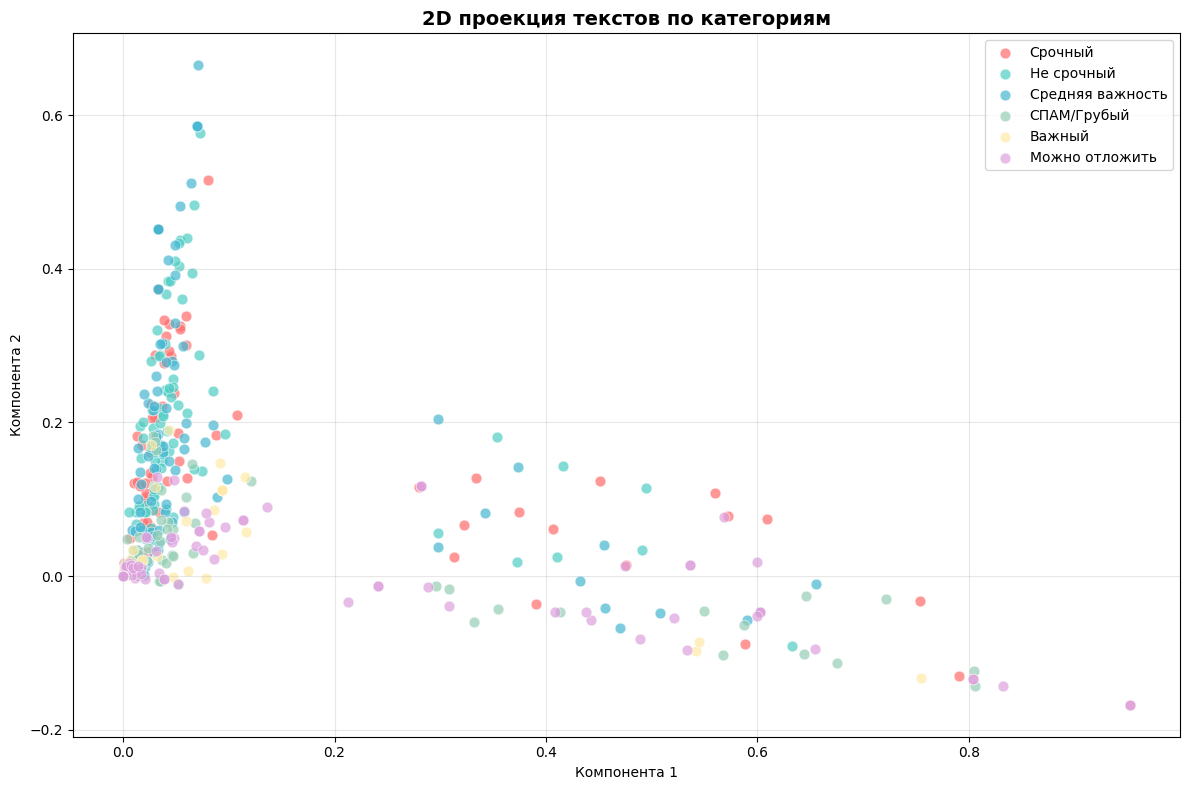

In [10]:

sample_df = df.sample(n=500, random_state=42)
X = tfidf.transform(sample_df['text'].str.lower())
y = sample_df['category']

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, category in enumerate(df['category'].unique()):
    mask = y == category
    if mask.any():
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=colors[i], label=category, alpha=0.7, s=60,
                   edgecolors='white', linewidth=0.5)

plt.title('2D проекция текстов по категориям', fontsize=14, fontweight='bold')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()